In [1]:
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mat
import os
import seaborn as sns
import numpy as np
import matplotlib.ticker as mticker
import ast
import json
from matplotlib import colors
from PIL import ImageColor
import glob
import matplotlib.ticker as ticker
import pathlib
import scipy.stats as st

from sklearn import preprocessing
import re

# %#config IPCompleter.greedy=True
# %#matplotlib notebook
# %#matplotlib inline
plt.rcParams["figure.figsize"] = [4, 4]

POINT_PLOT_DODGE = 0.15
sns.set(font_scale=1.25, style="white")
FIGSIZE = [6, 6]
# PALETTE = sns.cubehelix_palette(as_cmap=False, n_colors=3, reverse=False, light=0.7)

# ets

In [2]:
tc8_tput = pd.read_csv("./8tc_2544/results.csv")
tc1_tput = pd.read_csv("./1tc_2544/results.csv")

In [3]:
tc8_tput.columns

Index(['Trial', 'Framesize', 'Iteration', 'Tx Port', 'Rx Port', 'Traffic Item',
       'Flow Group', 'Tx Rate (% Line Rate)', 'Rx Throughput (% Line Rate)',
       'Rx Throughput (fps)', 'Rx Throughput (Gbps)', 'Tx Count (frames)',
       'Rx Count (frames)', 'Frame Loss (frames)', 'Frame Loss (%)',
       'Min Latency (ns)', 'Max Latency (ns)', 'Avg Latency (ns)'],
      dtype='object')

[(-0.2, 105.0)]

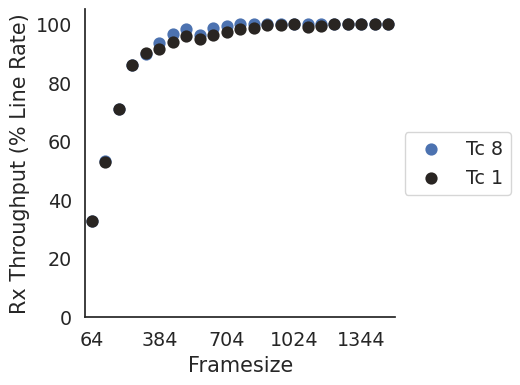

In [4]:
tc8_tput['label'] = 'Tc 8'
tc1_tput['label'] = 'Tc 1'
sns.pointplot(
    data = tc8_tput,
    x = 'Framesize',
    y = tc8_tput['Rx Throughput (% Line Rate)']*8,
    join = False,
    hue = 'label',
)

p1 = sns.pointplot(
    data = tc1_tput,
    x = 'Framesize',
    y = tc1_tput['Rx Throughput (% Line Rate)']*8,
    join = False,
    hue = 'label',
    color = 'orange',
)
p1.xaxis.set_major_locator(ticker.AutoLocator())
p1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
sns.despine()
p1.set(
    #ylabel="Avg Latency (us)",
   # xlabel="Batch size",
    ylim=[-0.2, 105],
   #title = 'Forwarding thread\n ST CPU at 3 GHz'
)


In [5]:
tc8_hist = pd.read_csv("./8tc_2544/latencyBinsResults.csv")
tc1_hist = pd.read_csv("./1tc_2544/latencyBinsResults.csv")

[Text(0, 0.5, 'Avg Latency (us)'), (-0.2, 300.0)]

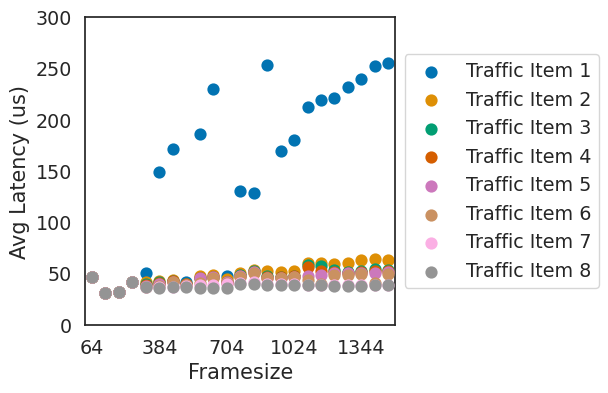

In [6]:
p1 = sns.pointplot(
    data = tc8_tput,
    hue = 'Traffic Item',
    y = tc8_tput['Avg Latency (ns)']/10**3,
    x = 'Framesize',
    join = False,
    palette = 'colorblind',
)
p1.xaxis.set_major_locator(ticker.AutoLocator())
p1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
p1.set(
    ylabel="Avg Latency (us)",
   # xlabel="Batch size",
    ylim=[-0.2, 300],
   #title = 'Forwarding thread\n ST CPU at 3 GHz'
)

[Text(0, 0.5, 'Avg Latency (us)'), (-0.2, 300.0)]

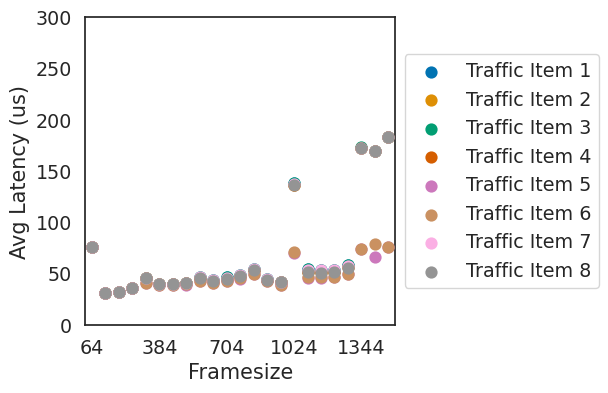

In [7]:
p1 = sns.pointplot(
    data = tc1_tput,
    hue = 'Traffic Item',
    y = tc1_tput['Avg Latency (ns)']/10**3,
    x = 'Framesize',
    join = False,
    palette = 'colorblind',
)
p1.xaxis.set_major_locator(ticker.AutoLocator())
p1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
p1.set(
    ylabel="Avg Latency (us)",
   # xlabel="Batch size",
   ylim=[-0.2, 300],
   #title = 'Forwarding thread\n ST CPU at 3 GHz'
)

# qos_sched

In [9]:
pd_df = pd.read_csv("./qos_sched_3ghz/qos_sched_no_class_no_hqos/Run0001/iteration.csv")
class_df = pd.read_csv("./qos_sched_3ghz/qos_sched_class_no_hqos/Run0001/iteration.csv")
hqos_df = pd.read_csv("./qos_sched_3ghz/qos_sched_class_hqos/Run0001/iteration.csv")
tx2_df = pd.read_csv("./qos_sched_3ghz/qos_sched_class_hqos_2tx/Run0001/iteration.csv")

pd_df['label'] = 'No Class; No HQoS'
class_df['label'] = 'Class; No HQoS'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[(-0.2, 30.0)]

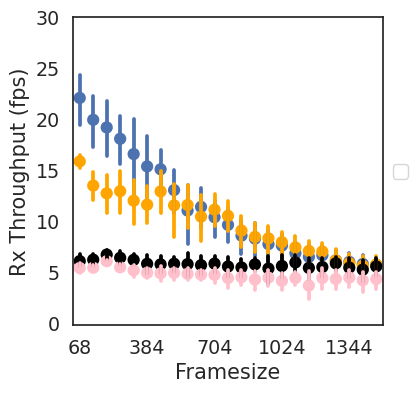

In [10]:
pd_df = pd_df[pd_df['Frame Loss (frames)'] == 0]
p1 = sns.pointplot(
    data=pd_df,
    # hue = 'Traffic Item',
    y=pd_df["Rx Throughput (fps)"] / 10**6,
    x="Framesize",
    units="Trial",
    join=False,
    # palette = 'colorblind',
)
class_df = class_df[class_df['Frame Loss (frames)'] == 0]
p1 = sns.pointplot(
    data=class_df,
    # hue = 'Traffic Item',
    y=class_df["Rx Throughput (fps)"] / 10**6,
    x="Framesize",
    units="Trial",
    ci=95,
    join=False,
    color="orange",
    # palette = 'colorblind',
)
hqos_df = hqos_df[hqos_df['Frame Loss (frames)'] == 0]
p1 = sns.pointplot(
    data=hqos_df,
    # hue = 'Traffic Item',
    y=hqos_df["Rx Throughput (fps)"] / 10**6,
    x="Framesize",
    units="Trial",
    ci=95,
    join=False,
    color="black",
    # palette = 'colorblind',
)
tx2_df = tx2_df[tx2_df['Frame Loss (frames)'] == 0]
p1 = sns.pointplot(
    data=tx2_df,
    # hue = 'Traffic Item',
    y=tx2_df["Rx Throughput (fps)"] / 10**6,
    x="Framesize",
    units="Trial",
    ci=95,
    join=False,
    color="pink",
    # palette = 'colorblind',
)


p1.xaxis.set_major_locator(ticker.AutoLocator())
p1.legend(loc="center left", bbox_to_anchor=(1, 0.5))
p1.set(
    # ylabel="Avg Latency (us)",
    # xlabel="Batch size",
    ylim=[-0.2, 30],
    # title = 'Forwarding thread\n ST CPU at 3 GHz'
)

[Text(0, 0.5, 'Avg Latency (us)'), (-0.2, 700.0)]

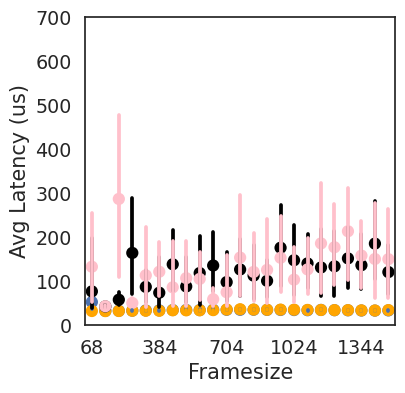

In [11]:
p1 = sns.pointplot(
    data = pd_df,
    #hue = 'Traffic Item',
    y = pd_df['Avg Latency (ns)']/10**3,
    x = 'Framesize',
    units = 'Trial',
    join = False,
 
    #palette = 'colorblind',
)
p1 = sns.pointplot(
    data = class_df,
    #hue = 'Traffic Item',
    y = class_df['Avg Latency (ns)']/10**3,
    x = 'Framesize',
    units = 'Trial',
    join = False,
    color='orange'
 
    #palette = 'colorblind',
)
p1 = sns.pointplot(
    data = hqos_df,
    #hue = 'Traffic Item',
    y = hqos_df['Avg Latency (ns)']/10**3,
    x = 'Framesize',
    units = 'Trial',
    join = False,
    color='black',
    ci=95,
 
    #palette = 'colorblind',
)
p1 = sns.pointplot(
    data = tx2_df,
    #hue = 'Traffic Item',
    y = tx2_df['Avg Latency (ns)']/10**3,
    x = 'Framesize',
    units = 'Trial',
    join = False,
    color='pink',
    ci=95,
 
    #palette = 'colorblind',
)


p1.xaxis.set_major_locator(ticker.AutoLocator())
# p1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
p1.set(
    ylabel="Avg Latency (us)",
   # xlabel="Batch size",
   ylim=[-0.2, 700],
   #title = 'Forwarding thread\n ST CPU at 3 GHz'
)

# Batch

In [12]:
batch_df = pd.read_csv("./qos_sched_3ghz/qos_sched_class_hqos/Run0001/iteration.csv")
batch256_df = pd.read_csv("./qos_sched_3ghz/qos_sched_class_hqos_256hqos_batch/Run0001/iteration.csv")
batch2x_df = pd.read_csv("./qos_sched_3ghz/qos_sched_class_hqos_256hqos_256thread_batch/Run0001/iteration.csv")

In [13]:
batch_df.columns

Index(['Trial', 'Framesize', 'Iteration', 'Tx Port', 'Rx Port', 'Traffic Item',
       'Flow Group', 'Tx Rate (% Line Rate)', 'Rx Throughput (% Line Rate)',
       'Rx Throughput (fps)', 'Rx Throughput (Gbps)', 'Tx Count (frames)',
       'Rx Count (frames)', 'Frame Loss (frames)', 'Frame Loss (%)',
       'Min Latency (ns)', 'Max Latency (ns)', 'Avg Latency (ns)'],
      dtype='object')

[(-0.2, 15.0)]

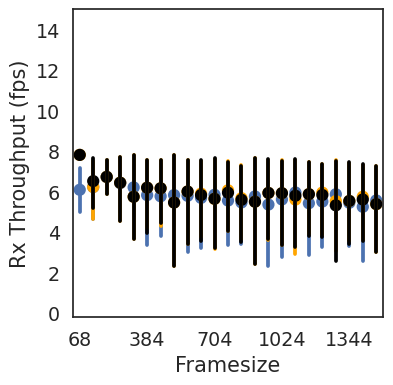

In [14]:
batch_df = batch_df[batch_df['Frame Loss (frames)'] == 0]
p1 = sns.pointplot(
    data=batch_df,
    # hue = 'Traffic Item',
    y=batch_df["Rx Throughput (fps)"] / 10**6,
    x="Framesize",
    units="Iteration",
    join=False,
    # palette = 'colorblind',
)
batch256_df = batch256_df[batch256_df['Frame Loss (frames)'] == 0]
p1 = sns.pointplot(
    data=batch256_df,
    # hue = 'Traffic Item',
    y=batch256_df["Rx Throughput (fps)"] / 10**6,
    x="Framesize",
    units="Iteration",
    ci=95,
    join=False,
    color="orange",
    # palette = 'colorblind',
)
batch2x_df = batch2x_df[batch2x_df['Frame Loss (frames)'] == 0]
p1 = sns.pointplot(
    data=batch2x_df,
    # hue = 'Traffic Item',
    y=batch2x_df["Rx Throughput (fps)"] / 10**6,
    x="Framesize",
    units="Iteration",
    ci=95,
    join=False,
    color="black",
    # palette = 'colorblind',
)

p1.xaxis.set_major_locator(ticker.AutoLocator())
# p1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
p1.set(
   # xlabel="Batch size",
   ylim=[-0.2, 15],
   #title = 'Forwarding thread\n ST CPU at 3 GHz'
)

[(-0.2, 300.0)]

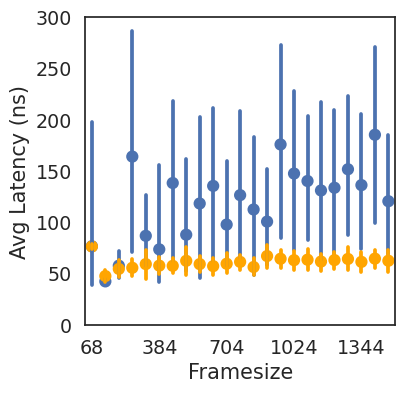

In [15]:
p1 = sns.pointplot(
    data = batch_df,
    #hue = 'Traffic Item',
    y = batch_df['Avg Latency (ns)']/10**3,
    x = 'Framesize',
    units = 'Trial',
    join = False,
    ci = 95,
    #palette = 'colorblind',
)
p1 = sns.pointplot(
    data = batch256_df,
    #hue = 'Traffic Item',
    y = batch256_df['Avg Latency (ns)']/10**3,
    x = 'Framesize',
    units = 'Trial',
    join = False,
    color='orange',
     ci = 95,
    #palette = 'colorblind',
)
p1.xaxis.set_major_locator(ticker.AutoLocator())
# p1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
p1.set(
   # xlabel="Batch size",
   ylim=[-0.2, 300],
   #title = 'Forwarding thread\n ST CPU at 3 GHz'
)

## QoS sched @ 2 GHz

In [16]:
experiment = None
DIR = f"/home/rubinhus/Documents/bisdn/ixia_measures/qos_sched_2ghz/{experiment}/Run0001/"

experiment = "qos_sched_noc_nohqos"
DIR = f"/home/rubinhus/Documents/bisdn/ixia_measures/qos_sched_2ghz/{experiment}/Run0001/"
base_df = pd.read_csv(DIR + 'AggregateResults.csv')

experiment = "qos_sched_c_nohqos"
DIR = f"/home/rubinhus/Documents/bisdn/ixia_measures/qos_sched_2ghz/{experiment}/Run0001/"
class_df = pd.read_csv(DIR + 'AggregateResults.csv')

experiment = "qos_sched_c_hqos"
DIR = f"/home/rubinhus/Documents/bisdn/ixia_measures/qos_sched_2ghz/{experiment}/Run0001/"
hqos_df = pd.read_csv(DIR + 'AggregateResults.csv')


In [17]:
base_df.columns

Index(['Trial', 'Framesize', 'Iteration', 'Agg Tx Rate (% Line Rate)',
       'Agg Rx Throughput (% Line Rate)', 'Agg Rx Throughput (fps)',
       'Agg Rx Throughput (Mbps)', 'Agg Tx Count (frames)',
       'Agg Rx Count (frames)', 'Agg Frame Loss (frames)',
       'Agg Frame Loss (%)', 'Min Latency (ns)', 'Max Latency (ns)',
       'Avg Latency (ns)', 'Stream Duration (s)'],
      dtype='object')

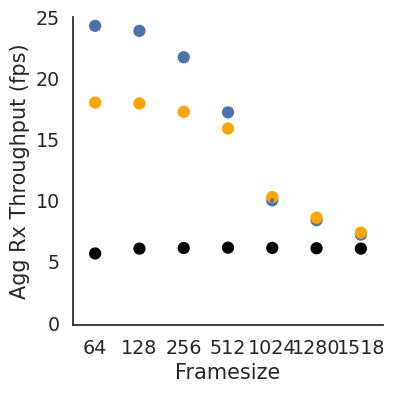

In [18]:
yax_units = 'fps'
mult_units = 6

p1 = sns.pointplot(
    data=base_df,
    # hue = 'Traffic Item',
    y=base_df[f"Agg Rx Throughput ({yax_units})"] / 10**mult_units,
    x="Framesize",
    units="Trial",
    join=False,
    # palette = 'colorblind',
)
p1 = sns.pointplot(
    data=class_df,
    # hue = 'Traffic Item',
    y=class_df[f"Agg Rx Throughput ({yax_units})"] / 10**mult_units,
    x="Framesize",
    units="Trial",
    join=False,
    color = 'orange',
    # palette = 'colorblind',
)
p1 = sns.pointplot(
    data=hqos_df,
    # hue = 'Traffic Item',
    y=hqos_df[f"Agg Rx Throughput ({yax_units})"] / 10**mult_units,
    x="Framesize",
    units="Trial",
    join=False,
    color = 'black',
    # palette = 'colorblind',
)
p1.set(
   # xlabel="Batch size",
   ylim=[-0.2, 25],
   #title = 'Forwarding thread\n ST CPU at 3 GHz'
)
sns.despine()


[(-0.2, 200.0)]

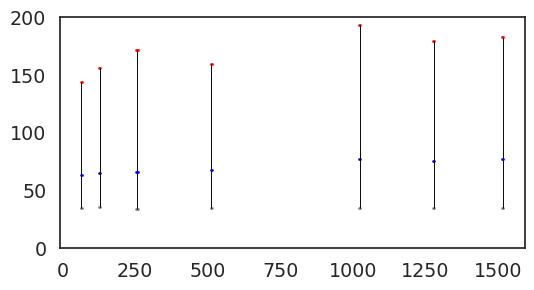

In [19]:
# %#matplotlib inline
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=[6, 3])

stats_df = {}

for label, group in hqos_df.groupby("Framesize"):
    stats_df[label] = {
        "min": group["Min Latency (ns)"].mean() / 10**3,
        "avg": group["Avg Latency (ns)"].mean() / 10**3,
        "max": group["Max Latency (ns)"].mean() / 10**3,
    }

for k, v in stats_df.items():
    if k == 0:
        label = [
            "Minimum",
            "Average",
            "Maximum",
        ]
    else:
        label = None

    plt.plot(
        [k,k],
        [v["min"], v["max"]],
        axes=ax1,
       # label=label[2] if label else None,
        color='black',
        linewidth=0.55,
    )
    plt.plot(
        [k - 2, k + 2],
        [v["min"], v["min"]],
        axes=ax1,
        label=label[0] if label else None,
        color = 'grey',
        linewidth=2,
    )
    plt.plot(
        [k - 2, k + 2],
        [v["avg"], v["avg"]],
        axes=ax1,
        label=label[1] if label else None,
        color='blue',
        linewidth=2,
    )
    plt.plot(
        [k - 2, k + 2],
        [v["max"], v["max"]],
        axes=ax1,
        label=label[2] if label else None,
        color='red',
        linewidth=2,
    )
    plt.plot(
        [k,k],
        [v["min"], v["max"]],
        axes=ax1,
       # label=label[2] if label else None,
        color='black',
        linewidth=0.55,
    )
    
ax1.set(
   # xlabel="Batch size",
   ylim=[-0.2, 200],
   #title = 'Forwarding thread\n ST CPU at 3 GHz'
)


## multiple threads

In [20]:
experiment = None
DIR = f"/home/rubinhus/Documents/bisdn/ixia_measures/qos_sched_2ghz/{experiment}/Run0001/"

experiment = "qos_sched_2rx1hqos"
DIR = f"/home/rubinhus/Documents/bisdn/ixia_measures/qos_sched_2ghz/{experiment}/Run0001/"
rx2_1hqos_df = pd.read_csv(DIR + 'AggregateResults.csv')

experiment = "qos_sched_2rx2hqos"
DIR = f"/home/rubinhus/Documents/bisdn/ixia_measures/qos_sched_2ghz/{experiment}/Run0001/"
rx2_2hqos_df = pd.read_csv(DIR + 'AggregateResults.csv')

experiment = "qos_sched_3rx3hqos"
DIR = f"/home/rubinhus/Documents/bisdn/ixia_measures/qos_sched_2ghz/{experiment}/Run0001/"
rx3_3hqos_df = pd.read_csv(DIR + 'AggregateResults.csv')

[(-0.2, 30.0)]

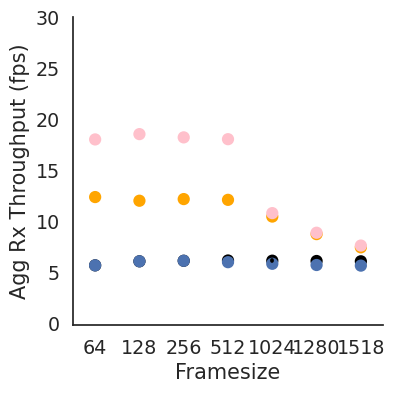

In [21]:
p1 = sns.pointplot(
    data=hqos_df,
    # hue = 'Traffic Item',
    y=hqos_df["Agg Rx Throughput (fps)"] / 10**6,
    x="Framesize",
    units="Trial",
    join=False,
    color = 'black',
    # palette = 'colorblind',
)

p1 = sns.pointplot(
    data=rx2_1hqos_df,
    # hue = 'Traffic Item',
    y=rx2_1hqos_df["Agg Rx Throughput (fps)"] / 10**6,
    x="Framesize",
    units="Trial",
    join=False,
    # palette = 'colorblind',
)
p1 = sns.pointplot(
    data=rx2_2hqos_df,
    # hue = 'Traffic Item',
    y=rx2_2hqos_df["Agg Rx Throughput (fps)"] / 10**6,
    x="Framesize",
    units="Trial",
    join=False,
    color = 'orange',
    # palette = 'colorblind',
)
p1 = sns.pointplot(
    data=rx3_3hqos_df,
    # hue = 'Traffic Item',
    y=rx3_3hqos_df["Agg Rx Throughput (fps)"] / 10**6,
    x="Framesize",
    units="Trial",
    join=False,
    color = 'pink',
    # palette = 'colorblind',
)

p1.set(
   # xlabel="Batch size",
   #ylim=[-0.2, 100],
   #title = 'Forwarding thread\n ST CPU at 3 GHz'
)
sns.despine()
p1.set(
   # xlabel="Batch size",
   ylim=[-0.2, 30],
   #title = 'Forwarding thread\n ST CPU at 3 GHz'
)


[(-0.2, 300.0)]

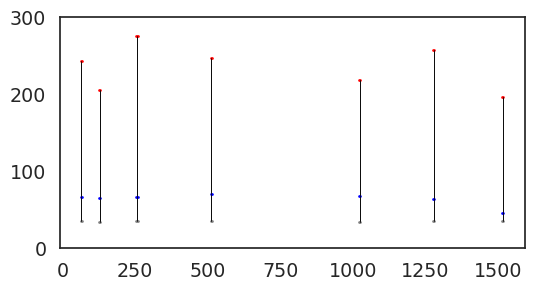

In [22]:
# %#matplotlib inline
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=[6, 3])

stats_df = {}

for label, group in rx2_2hqos_df.groupby("Framesize"):
    stats_df[label] = {
        "min": group["Min Latency (ns)"].mean() / 10**3,
        "avg": group["Avg Latency (ns)"].mean() / 10**3,
        "max": group["Max Latency (ns)"].mean() / 10**3,
    }

for k, v in stats_df.items():
    if k == 0:
        label = [
            "Minimum",
            "Average",
            "Maximum",
        ]
    else:
        label = None

    plt.plot(
        [k,k],
        [v["min"], v["max"]],
        axes=ax1,
       # label=label[2] if label else None,
        color='black',
        linewidth=0.55,
    )
    plt.plot(
        [k - 2, k + 2],
        [v["min"], v["min"]],
        axes=ax1,
        label=label[0] if label else None,
        color = 'grey',
        linewidth=2,
    )
    plt.plot(
        [k - 2, k + 2],
        [v["avg"], v["avg"]],
        axes=ax1,
        label=label[1] if label else None,
        color='blue',
        linewidth=2,
    )
    plt.plot(
        [k - 2, k + 2],
        [v["max"], v["max"]],
        axes=ax1,
        label=label[2] if label else None,
        color='red',
        linewidth=2,
    )
    plt.plot(
        [k,k],
        [v["min"], v["max"]],
        axes=ax1,
       # label=label[2] if label else None,
        color='black',
        linewidth=0.55,
    )
    
ax1.set(
   # xlabel="Batch size",
   ylim=[-0.2, 300],
   #title = 'Forwarding thread\n ST CPU at 3 GHz'
)


## QoS Sched illlustration

In [8]:
DIR = f"/home/rubinhus/Documents/bisdn/ixia_measures/paper3"
FILENAME = 'Flow Statistics cross page'

df_df = pd.DataFrame()
for direc, subdirec, files in os.walk(DIR):
    # print(direc,subdirec, files)
    
    filename = [i for i in files if FILENAME in i]
    
    if filename == []:
        continue
    
    csvs = [i for i in filename if 'columns' not in i]
    
    repeat = 1
    for i in csvs:
        label = direc.split('/')[-1]
        t_df = pd.read_csv(direc + '/' + i)
        
        t_df['label'] = int(label)*3
        t_df['experiment'] = direc.split('/')[-2]
        t_df['units'] = repeat
        t_df['qos'] = 'yes' if 'no' not in direc else 'no'
        t_df['cores'] = 8 if '8cores' in direc else 1
        repeat += 1
        
        df_df = pd.concat([df_df, t_df])

In [9]:
df_df.columns

Index(['Tx Port', 'Rx Port', 'Traffic Item', 'Flow Group', 'Tx Frames',
       'Rx Frames', 'Frames Delta', 'Loss %', 'Tx Frame Rate', 'Rx Frame Rate',
       'Tx L1 Rate (bps)', 'Rx L1 Rate (bps)', 'Rx Bytes', 'Tx Rate (Bps)',
       'Rx Rate (Bps)', 'Tx Rate (bps)', 'Rx Rate (bps)', 'Tx Rate (Kbps)',
       'Rx Rate (Kbps)', 'Tx Rate (Mbps)', 'Rx Rate (Mbps)',
       'Cut-Through Avg Latency (ns)', 'Cut-Through Min Latency (ns)',
       'Cut-Through Max Latency (ns)', 'First TimeStamp', 'Last TimeStamp',
       'label', 'experiment', 'units', 'qos', 'cores'],
      dtype='object')

In [11]:
pd_df = df_df[df_df["Flow Group"] == "Traffic Item 1-EndpointSet-1 - Flow Group 0001"]
pd_df.groupby(["qos", "cores", "label"]).describe()

stats = {}
for label, group in pd_df.groupby(["qos", "cores", "label"]):
    stats[label] = {
        "min": group["Cut-Through Min Latency (ns)"].mean() / 10**3 - 24,
        "avg": group["Cut-Through Avg Latency (ns)"].mean() / 10**3 - 24,
        "max": group["Cut-Through Max Latency (ns)"].mean() / 10**3 - 24,
        #"p95": st.t.interval(
        #    0.95,
        #     df = 29,
        #    loc = group["Cut-Through Avg Latency (ns)"].mean() / 10**3,
        #    scale = group["Cut-Through Avg Latency (ns)"].std()/np.sqrt(30),
        #),
    }
stats_df = pd.DataFrame(stats).transpose()


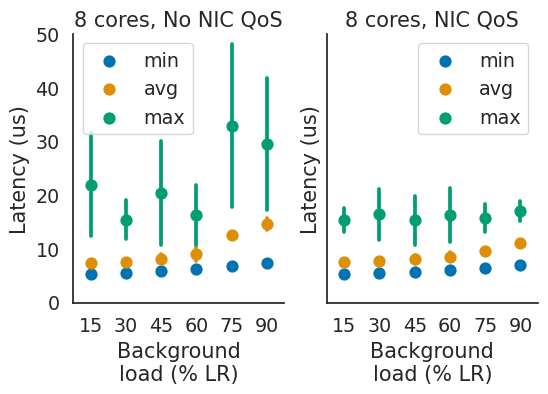

In [12]:
# %#matplotlib inline
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=[6, 3.5], sharey=True)

N_CPU = 8

melt_df = pd.melt(
    stats_df.reset_index(),
    id_vars=["level_0", "level_1", "level_2"],
    value_vars=["min", "avg", "max"],
)

pd_df = melt_df[melt_df["level_1"] == N_CPU]
pd_df = melt_df[melt_df["level_0"] == "no"]

sns.pointplot(
    data=pd_df,
    x="level_2",
    y="value",
    hue="variable",
    ax=ax1,
    palette='colorblind',
    join=False,
)
sns.despine()
pd_df = melt_df[melt_df["level_1"] == N_CPU]
pd_df = melt_df[melt_df["level_0"] == "yes"]

sns.pointplot(
    data=pd_df,
    x="level_2",
    y="value",
    hue="variable",
    ax=ax2,
    palette='colorblind',
    join=False,
)
sns.despine()

ax1.set(
    xlabel="Background\nload (% LR)",
    ylabel="Latency (us)",
    ylim=[-0.2, 50],
    title = f'{N_CPU} cores, No NIC QoS'
)
ax1.legend(title='')
ax2.set(
    xlabel="Background\nload (% LR)",
    ylabel="Latency (us)",
    ylim=[-0.2, 50],
    title = f'{N_CPU} cores, NIC QoS'
)
ax2.legend(title='')

# ECDF

In [2]:
DIR = f"/home/rubinhus/Documents/bisdn/ixia_measures/paper3"
FILENAME = 'Traffic Item'

l2_df = pd.DataFrame()
for direc, subdirec, files in os.walk(DIR):
    # print(direc,subdirec, files)
    
    filename = [i for i in files if FILENAME in i]
    
    if filename == []:
        continue
    
    csvs = [i for i in filename if 'columns' not in i]
    
    repeat = 1
    for i in csvs:
        label = direc.split('/')[-1]
        t_df = pd.read_csv(direc + '/' + i)
        
        t_df['label'] = int(label)*3
        t_df['experiment'] = direc.split('/')[-2]
        t_df['units'] = repeat
        t_df['qos'] = 'yes' if 'no' not in direc else 'no'
        t_df['cores'] = 8 if '8cores' in direc else 1
        repeat += 1
        
        l2_df = pd.concat([l2_df, t_df])

In [3]:
DIR = f"/home/rubinhus/Documents/bisdn/ixia_measures/paper3"
FILENAME = 'Latency Bins'

df_df = pd.DataFrame()
for direc, subdirec, files in os.walk(DIR):
    # print(direc,subdirec, files)
    
    filename = [i for i in files if FILENAME in i]
    
    if filename == []:
        continue
    
    csvs = [i for i in filename if 'columns' not in i]
    
    repeat = 1
    for i in csvs:
        label = direc.split('/')[-1]
        t_df = pd.read_csv(direc + '/' + i)
        
        t_df['label'] = int(label)*3
        t_df['experiment'] = direc.split('/')[-2]
        t_df['units'] = repeat
        t_df['qos'] = 'yes' if 'no' not in direc else 'no'
        t_df['cores'] = 8 if '8cores' in direc else 1
        repeat += 1
        
        df_df = pd.concat([df_df, t_df])

In [6]:
df_df.columns
p_df = df_df[df_df["label"] == 90].set_index(["qos", "cores"])
p_df = (
    p_df.loc[:, p_df.columns.str.contains("Bin")]
    .rename(lambda x: x.strip("Rx frames per Bin : "), axis=1)
    .reset_index()
)
cores_1_df = (
    p_df[p_df["cores"] == 1]
    .groupby(["qos"])
    .mean()
    .astype(int)
    .reset_index()
    .transpose()
)
cores_8_df = (
    p_df[p_df["cores"] == 8]
    .groupby(["qos"])
    .mean()
    .astype(int)
    .reset_index()
    .transpose()
)

In [7]:
# cores == 1
# Qos == no
frequency = cores_1_df.drop(labels=["qos", "cores"])[0].values[3:-1]
bins = cores_1_df.drop(labels=["qos", "cores"])[0].index
bins = [int(i.split(" ")[-1].strip("u")) - 24 for i in bins[:-1]]

# calculate sum
cumsum_frequencies = np.cumsum(frequency)
cores_1_qos_no_ecdf = cumsum_frequencies / cumsum_frequencies[-1]

frequency = cores_1_df.drop(labels=["qos", "cores"])[1].values[3:-1]

cumsum_frequencies = np.cumsum(frequency)
cores_1_qos_yes_ecdf = cumsum_frequencies / cumsum_frequencies[-1]

In [8]:
# cores == 1
# Qos == no
frequency = cores_8_df.drop(labels=["qos", "cores"])[0].values[3:-1]
bins = cores_8_df.drop(labels=["qos", "cores"])[0].index[3:]
#bins = [int(i.split(" ")[-1].strip("u")) for i in bins[-1]]
bins = [int(i.split(" ")[-1].strip("u")) - 24 for i in bins[:-1]]

# calculate sum
cumsum_frequencies = np.cumsum(frequency)
cores_8_qos_no_ecdf = cumsum_frequencies / cumsum_frequencies[-1]

frequency = cores_8_df.drop(labels=["qos", "cores"])[1].values[3:-1]

cumsum_frequencies = np.cumsum(frequency)
cores_8_qos_yes_ecdf = cumsum_frequencies / cumsum_frequencies[-1]

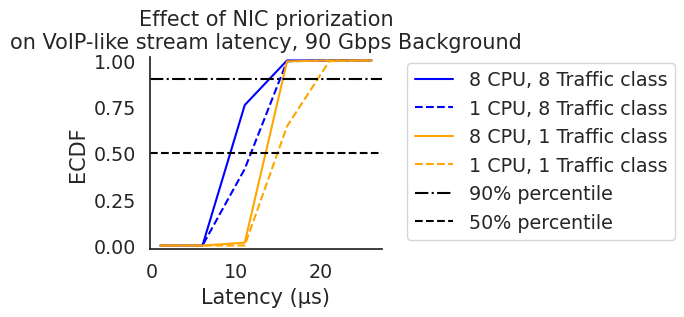

In [22]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=[3, 2.5])

ax1.plot(bins, cores_8_qos_yes_ecdf, color='blue', label='8 CPU, 8 Traffic class')
ax1.plot(bins, cores_1_qos_yes_ecdf, linestyle='--', color='blue', label='1 CPU, 8 Traffic class')

ax1.plot(bins, cores_8_qos_no_ecdf, color='orange', label='8 CPU, 1 Traffic class')
ax1.plot(bins, cores_1_qos_no_ecdf, linestyle='--', color='orange', label='1 CPU, 1 Traffic class')

ax1.axhline(y=0.9, color='black', linestyle='-.', label='90% percentile')
ax1.axhline(y=0.5, color='black', linestyle='--', label='50% percentile')

ax1.set(
    xlabel="Latency (µs)",
    ylabel="ECDF",
    ylim=[-0.02, 1.02],
    #xlim=['25','50']
    title='Effect of NIC priorization\non VoIP-like stream latency'
)
ax1.legend(loc='lower right', bbox_to_anchor=(2.3,0))

sns.despine()

# fig.savefig("/home/rubinhus/Documents/bisdn/ixia_measures//output_figures/nic_priorization.png", bbox_inches='tight')

## VPP Packet loss

In [7]:
DIR = f"/home/rubinhus/Documents/bisdn/ixia_measures/packet_loss"
FILENAME = 'Traffic Item'

df_df = pd.DataFrame()
for direc, subdirec, files in os.walk(DIR):
    # print(direc,subdirec, files)
    
    filename = [i for i in files if FILENAME in i]
    
    if filename == []:
        continue
    
    csvs = [i for i in filename if 'columns' not in i]
    
    repeat = 1
    for i in csvs:
        label = direc.split('/')[-1]
        t_df = pd.read_csv(direc + '/' + i)
        
        t_df['label'] = label
        t_df['experiment'] = direc.split('/')[-2]
        t_df['units'] = repeat
        repeat += 1
        
        df_df = pd.concat([df_df, t_df])

In [8]:
df_df.columns

Index(['Traffic Item', 'Tx Frames', 'Rx Frames', 'Frames Delta', 'Loss %',
       'Tx Frame Rate', 'Rx Frame Rate', 'Tx L1 Rate (bps)',
       'Rx L1 Rate (bps)', 'Rx Bytes', 'Tx Rate (Bps)', 'Rx Rate (Bps)',
       'Tx Rate (bps)', 'Rx Rate (bps)', 'Tx Rate (Kbps)', 'Rx Rate (Kbps)',
       'Tx Rate (Mbps)', 'Rx Rate (Mbps)', 'Cut-Through Avg Latency (ns)',
       'Cut-Through Min Latency (ns)', 'Cut-Through Max Latency (ns)',
       'First TimeStamp', 'Last TimeStamp', 'label', 'experiment', 'units'],
      dtype='object')

/home/rubinhus/.local/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/home/rubinhus/.local/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


[Text(0.5, 0, 'Thread Configuration'),
 Text(0.5, 1.0, 'VPP/DPDK packet loss at ≈ 0.1% NDR\n8% LR,128 Byte packets')]

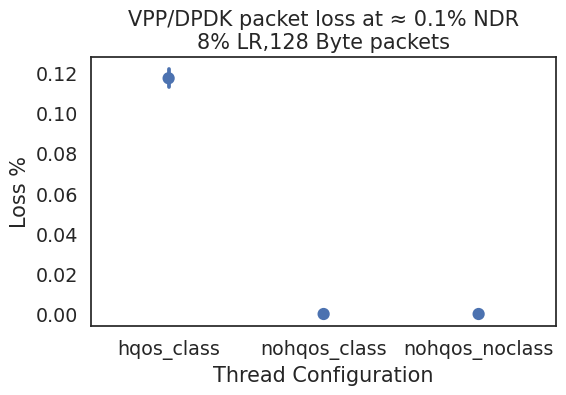

In [24]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=[6, 3.5], sharey=True)

sns.pointplot(
    data = df_df,
    x = 'label',
    y = 'Loss %',
    join = False,
)

ax1.set(
    xlabel="Thread Configuration",
    title = f'VPP/DPDK packet loss at ≈ 0.1% NDR\n8% LR,128 Byte packets'
)


64,128,256,512,1024,1280,1518 = IXIA packet values

In [44]:
DIR = f"/home/rubinhus/Documents/bisdn/ixia_measures/packet_loss/vpp-packetloss/Run0001/"
FILENAME = 'AggregateResults.csv'

df_df = pd.DataFrame()
for direc, subdirec, files in os.walk(DIR):
    # print(direc,subdirec, files)
    
    filename = [i for i in files if FILENAME in i and '.idx' not in i]
    
    if filename == []:
        continue
    
    csvs = [i for i in filename if 'columns' not in i]
    
    repeat = 1
    for i in csvs:
        label = direc.split('/')[-1]
        t_df = pd.read_csv(direc + '/' + i)
        
        t_df['label'] = label
        t_df['experiment'] = direc.split('/')[-2]
        t_df['units'] = repeat
        repeat += 1
        
        df_df = pd.concat([df_df, t_df])

In [50]:
df_df[df_df['Framesize'] == 128]

,Trial,Framesize,Iteration,Agg Tx Rate (% Line Rate),Agg Rx Throughput (% Line Rate),Agg Rx Throughput (fps),Agg Rx Throughput (Mbps),Agg Tx Count (frames),Agg Rx Count (frames),Agg Frame Loss (frames),Agg Frame Loss (%),Min Latency (ns),Max Latency (ns),Avg Latency (ns),Stream Duration (s),label,experiment,units
1,1,128,5,8.313,8.297,7007751.922,7175.938,140413851.0,140326192.0,87659.0,0.062,87045.0,24670462.0,4066567.0,20,,Run0001,1


## Shaper tests => burst parameters

## Queues not full => tests not so meaningful?

In [24]:
DIR = f"/home/rubinhus/Documents/bisdn/ixia_measures/single_core_latency"
FILENAME = 'Traffic Item'

df_df = pd.DataFrame()
for direc, subdirec, files in os.walk(DIR):
    # print(direc,subdirec, files)
    
    filename = [i for i in files if FILENAME in i]
    
    if filename == []:
        continue
    
    csvs = [i for i in filename if 'columns' not in i]
    
    repeat = 1
    for i in csvs:
        label = direc.split('/')[-1]
        t_df = pd.read_csv(direc + '/' + i)
        
        t_df['label'] = label
        t_df['experiment'] = direc.split('/')[-2]
        t_df['units'] = repeat
        repeat += 1
        
        df_df = pd.concat([df_df, t_df])

{'min': 72.68269999999998, 'avg': 260.4738, 'max': 449.27790000000005}
{'min': 41.2707, 'avg': 447.6996, 'max': 1304.7955}
{'min': 72.94239999999999, 'avg': 140.5456, 'max': 209.995}
{'min': 66.00630000000001, 'avg': 232.7226, 'max': 481.3435}
{'min': 51.8675, 'avg': 268.922, 'max': 537.4222}
{'min': 44.95589999999999, 'avg': 350.8873, 'max': 733.6249}


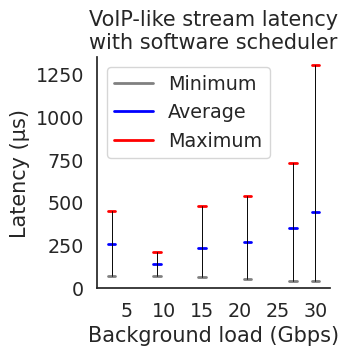

In [28]:
# %#matplotlib inline
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=[3, 3])

BAR_WIDTH = 0.5

stats_df = {}

for label, group in df_df[df_df["Traffic Item"] == "TC 0"].groupby("label"):
    stats_df[label] = {
        "min": (group["Cut-Through Min Latency (ns)"].mean()) / 10**3 - 23.957,
        "avg": (group["Cut-Through Avg Latency (ns)"].mean()) / 10**3 - 23.957,
        "max": (group["Cut-Through Max Latency (ns)"].mean()) / 10**3 - 23.957,
    }

for k, v in stats_df.items():
    k = 3 * int(k)  # 3 concurrent streams
    
    if k == 3:
        label = [
            "Minimum",
            "Average",
            "Maximum",
        ]
    else:
        label = None

    print(v)
    plt.plot(
        [k, k],
        [v["min"], v["max"]],
        axes=ax1,
        # label=label[2] if label else None,
        color="black",
        linewidth=0.55,
    )
    plt.plot(
        [k - BAR_WIDTH, k + BAR_WIDTH],
        [v["min"], v["min"]],
        axes=ax1,
        label=label[0] if label else None,
        color="grey",
        linewidth=2,
    )
    plt.plot(
        [k - BAR_WIDTH, k + BAR_WIDTH],
        [v["avg"], v["avg"]],
        axes=ax1,
        label=label[1] if label else None,
        color="blue",
        linewidth=2,
    )
    plt.plot(
        [k - BAR_WIDTH, k + BAR_WIDTH],
        [v["max"], v["max"]],
        axes=ax1,
        label=label[2] if label else None,
        color="red",
        linewidth=2,
    )
    plt.plot(
        [k, k],
        [v["min"], v["max"]],
        axes=ax1,
        #label=label[2] if label else None,
        color="black",
        linewidth=0.55,
    )

ax1.set(
    xlabel="Background load (Gbps)",
    ylabel="Latency (µs)",
    ylim=[-0.2, 1350],
    title = 'VoIP-like stream latency\nwith software scheduler'
)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax1.legend(title="",loc="upper left")#, bbox_to_anchor=(1.2,1.1))
sns.despine()

# fig.savefig("/home/rubinhus/Documents/bisdn/ixia_measures//output_figures/latency_increase.png", bbox_inches='tight')

## Static load allocation

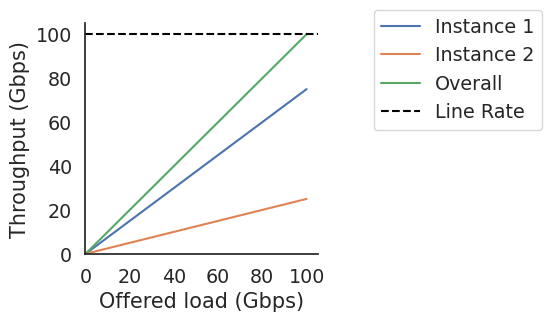

In [88]:
xticks = list(range(0,105,5))
input_total = list(range(0,105,5))

input_l1 = [3/4*i for i in input_total]
input_l2 = [1/4*i for i in input_total]

# %#matplotlib inline
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=[3, 3])

ax1.plot(xticks, input_l1, label='Instance 1')
ax1.plot(xticks, input_l2, label='Instance 2')
ax1.plot(xticks, input_total, label='Overall')

ax1.axhline(y=100, color='black', linestyle='--', label='Line Rate')

ax1.set(
    xlabel="Offered load (Gbps)",
    ylabel="Throughput (Gbps)",
    ylim=[-0.2, 105],
    xlim=[-0.2, 105],
)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax1.legend(title="", bbox_to_anchor=(1.2,1.1))

sns.despine()

In [98]:
xticks = list(range(0,105,5))

# Full pipes
l1 = list(range(0,50,5)) 
l1 += [50 for i in range(len(xticks) - len(l1))]

# Leftover pipes
l3 = list(range(0,(len(l1)),1))
l4 = list(range(0,(len(l1)),1))

elem_sum = np.array([l1,l3])

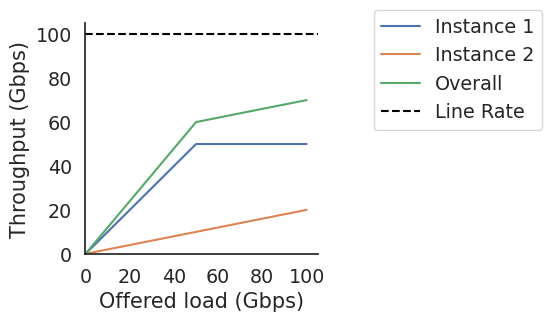

In [167]:
# %#matplotlib inline
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=[3, 3])

input_total = list(range(0,105,5))

# Merge the two plots into one
ax1.plot(xticks, l1, label='Instance 1')
ax1.plot(xticks, l3, label='Instance 2')

ax1.plot(xticks, elem_sum.sum(0), label='Overall')

ax1.axhline(y=100, color='black', linestyle='--', label='Line Rate')

ax1.set(
    xlabel="Offered load (Gbps)",
    ylabel="Throughput (Gbps)",
    ylim=[-0.2, 105],
    xlim=[-0.2, 105],
)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax1.legend(title="", bbox_to_anchor=(1.2,1.1))

sns.despine()

## VPP hqos 

In [9]:
DIR = f"/home/rubinhus/Documents/bisdn/ixia_measures/vpp_hqos_baseline"
FILENAME = 'AggregateResults'

df_df = pd.DataFrame()
for direc, subdirec, files in os.walk(DIR):
    # print(direc,subdirec, files)
    
    filename = [i for i in files if FILENAME in i]
    
    if filename == []:
        continue
    
    csvs = [i for i in filename if 'columns' not in i]
    
    repeat = 1
    
    for i in csvs:
        
        if 'idx' in i:
            continue
            
        label = direc.split('/')[-2]
        t_df = pd.read_csv(direc + '/' + i)
        
        label_list = label.split('_')
        
        t_df['nhqos'] = int(label_list[2].strip('h'))
        t_df['nclass'] = int(label_list[3].strip('c'))
        
        if len(label_list) > 4:
            t_df['rss'] = 'y'
            t_df['nsessions'] = int(label_list[-1])
        else:
            t_df['rss'] = 'n'
            t_df['nsessions'] = 256
            
        #t_df['label'] = int(label)*3
        #t_df['experiment'] = direc.split('/')[-2]
        t_df['units'] = repeat
        t_df['qos'] = 'yes' if 'no' not in direc else 'no'
        t_df['cores'] = 8 if '8cores' in direc else 1
        repeat += 1
        
        df_df = pd.concat([df_df, t_df])

In [10]:
df_df.columns

Index(['Trial', 'Framesize', 'Iteration', 'Agg Tx Rate (% Line Rate)',
       'Agg Rx Throughput (% Line Rate)', 'Agg Rx Throughput (fps)',
       'Agg Rx Throughput (Mbps)', 'Agg Tx Count (frames)',
       'Agg Rx Count (frames)', 'Agg Frame Loss (frames)',
       'Agg Frame Loss (%)', 'Min Latency (ns)', 'Max Latency (ns)',
       'Avg Latency (ns)', 'Stream Duration (s)', 'nhqos', 'nclass', 'rss',
       'nsessions', 'units', 'qos', 'cores'],
      dtype='object')

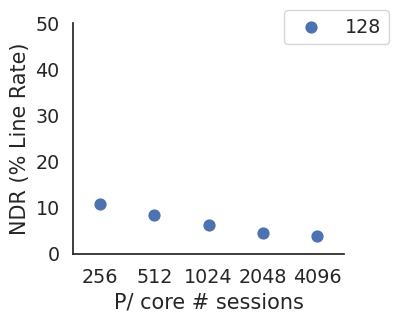

In [15]:
# %#matplotlib inline
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=[3.5, 3])

p_df = df_df[df_df['Framesize'] == 128]
p_df = p_df[p_df['nhqos'] == 1]
p_df = p_df[p_df['nclass'] == 4]

sns.pointplot(
    data = p_df,
    x = 'nsessions',
    y = 'Agg Tx Rate (% Line Rate)',
     hue = 'Framesize',
    units = 'units',
    ci = 'sd',
    ax = ax1,
    join = False
)
ax1.legend(title="", bbox_to_anchor=(1.2,1.1))

# ax1.axhline(y=25, color='black', linestyle='--', label='PIR')

ax1.set(
    xlabel="P/ core # sessions",
    ylabel="NDR (% Line Rate)",
    ylim=[-0.2, 50],
    #xlim=[-0.2, 105],
)

sns.despine()

In [212]:
DIR = f"/home/rubinhus/Documents/bisdn/ixia_measures/qosched_tc"
FILENAME = "AggregateResults"

qostc_df = pd.DataFrame()
for direc, subdirec, files in os.walk(DIR):
    # print(direc,subdirec, files)

    filename = [i for i in files if FILENAME in i]

    if filename == []:
        continue

    csvs = [i for i in filename if "columns" not in i]

    repeat = 1

    for i in csvs:

        if "idx" in i:
            continue

        label = direc.split("/")[-2]
        t_df = pd.read_csv(direc + "/" + i)

        label_list = label.split("_")

        t_df["nhqos"] = int(label_list[1].strip("c"))
        t_df["nclass"] = int(label_list[2].strip("h"))

        # t_df['nsess'] = 256 if '256' in label_list[3] else 4096

        if "4k" in label_list[3]:
            t_df["nsess"] = 4096
        elif "1k" in label_list[3]:
            t_df["nsess"] = 1024
        elif "2k" in label_list[3]:
            t_df["nsess"] = 2048
        elif "512" in label_list[3]:
            t_df["nsess"] = 512
            print(label_list)
        else:
            t_df["nsess"] = 256

        if len(label_list) > 4:
            t_df["ntc"] = int(label_list[-1].strip("tc"))
        else:
            t_df["ntc"] = 1
            
        t_df['nqueues'] = t_df['ntc']*t_df['nsess']

        # t_df['label'] = int(label)*3
        # t_df['experiment'] = direc.split('/')[-2]
        qostc_df = pd.concat([qostc_df, t_df])

['qossched', '1c', '1h', '512sess', '8tc']


In [213]:
p_df.groupby(['nqueues', 'ntc']).describe()['Avg Latency (ns)']

count         mean            std         min           25%  \
nqueues ntc                                                                
256     1     10.0   87279.7000     274.974767   87165.000   87179.25000   
4096    1     10.0  462974.8000   32743.284485  411844.000  443329.50000   
        2     10.0  544907.9000  156728.893639  396641.500  402274.62500   
        4     10.0  171700.0000  144800.608256   62101.750   64125.56250   
        8     10.0  125528.5375   18537.714123   97378.250  114240.65625   
8192    2     10.0  309026.8500     719.880470  307411.000  308760.25000   
16384   4     10.0  171303.9250    1197.904815  170030.250  170163.87500   
32768   8     10.0  162569.5125    8243.080201  153913.125  155042.87500   

                     50%           75%         max  
nqueues ntc                                         
256     1     87193.0000   87212.50000   88060.000  
4096    1    458396.5000  478892.75000  532221.000  
        2    505435.0000  709036.00000  734465.000  
        4    135262.5000  162297.31250  437800.250  
        8    132262.3125  133489.46875  155994.000  
8192    2    309151.0000  309603.25000  309710.000  
16384   4    171181.1250  172424.18750  172860.250  
32768   8    162795.7500  170258.37500  170917.125

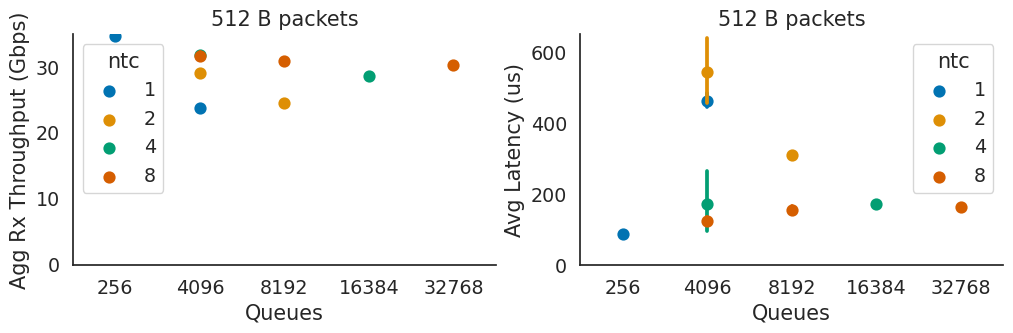

In [214]:
# %#matplotlib inline
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=[12, 3])
p_df = qostc_df[qostc_df['nsess'] == 4096]
p_df = qostc_df[qostc_df['Framesize'] == 512]

sns.pointplot(
    data = p_df,
    x = 'nqueues',
    y = p_df['Agg Rx Throughput (Mbps)']/10**3,
    hue = 'ntc',
    palette = 'colorblind',
    units = 'Trial',
    ci = 95,
    ax=ax1,
    join=False,
)

sns.pointplot(
    data = p_df,
    x = 'nqueues',
    y = p_df['Avg Latency (ns)']/10**3,
    hue = 'ntc',
    palette = 'colorblind',
    units = 'Trial',
    ci = 95,
    ax=ax2,
    join=False,
)
ax1.set(
    xlabel="Queues",
    ylabel="Agg Rx Throughput (Gbps)",
    ylim=[-0.2, 35],
    title='512 B packets',
    #xlim=[-0.2, 105],
)
ax2.set(
    xlabel="Queues",
    ylabel="Avg Latency (us)",
    ylim=[-0.2, 650],
    title='512 B packets',
    #xlim=[-0.2, 105],
)

sns.despine()

In [209]:
p_df[p_df['nqueues'] == 4096].groupby('ntc')['Avg Latency (ns)'].describe()

,count,mean,std,min,25%,50%,75%,max
ntc,,,,,,,,
1,10.0,462974.8000,32743.284485,411844.00,443329.50000,458396.5000,478892.75000,532221.00
2,10.0,544907.9000,156728.893639,396641.50,402274.62500,505435.0000,709036.00000,734465.00
4,10.0,171700.0000,144800.608256,62101.75,64125.56250,135262.5000,162297.31250,437800.25
8,10.0,125528.5375,18537.714123,97378.25,114240.65625,132262.3125,133489.46875,155994.00


In [175]:
p_df.groupby('nqueues')['Avg Latency (ns)'].describe()

,count,mean,std,min,25%,50%,75%,max
nqueues,,,,,,,,
256,10.0,87279.700000,274.974767,87165.000,87179.2500,87193.000,87212.5000,88060.000
4096,30.0,393194.233333,202475.214299,62101.750,222090.8125,435160.750,478892.7500,734465.000
8192,10.0,309026.850000,719.880470,307411.000,308760.2500,309151.000,309603.2500,309710.000
16384,10.0,171303.925000,1197.904815,170030.250,170163.8750,171181.125,172424.1875,172860.250
32768,10.0,162569.512500,8243.080201,153913.125,155042.8750,162795.750,170258.3750,170917.125


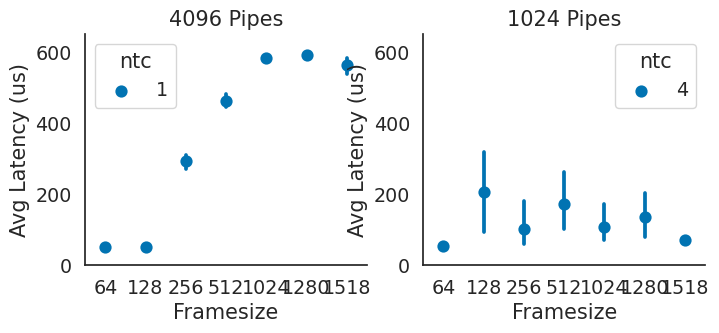

In [176]:
# %#matplotlib inline
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=[8, 3])

p_df = qostc_df[qostc_df["nsess"] == 4096]
p_df = p_df[p_df["ntc"] == 1]
sns.pointplot(
    data=p_df,
    x="Framesize",
    y=p_df["Avg Latency (ns)"] / 10**3,
    hue="ntc",
    palette="colorblind",
    units="Trial",
    ax=ax1,
    ci=95,
    join=False,
)

p_df = qostc_df[qostc_df["nsess"] == 1024]
p_df = p_df[p_df["ntc"] == 4]
sns.pointplot(
    data=p_df,
    x="Framesize",
    y=p_df["Avg Latency (ns)"] / 10**3,
    hue="ntc",
    palette="colorblind",
    units="Trial",
    ax=ax2,
    ci=95,
    join=False,
)

ax1.set(
    xlabel="Framesize",
    ylabel="Avg Latency (us)",
    ylim=[-0.2, 650],
    title="4096 Pipes",
    # xlim=[-0.2, 105],
)
ax2.set(
    xlabel="Framesize",
    ylabel="Avg Latency (us)",
    ylim=[-0.2, 650],
    title="1024 Pipes",
    # xlim=[-0.2, 105],
)

sns.despine()

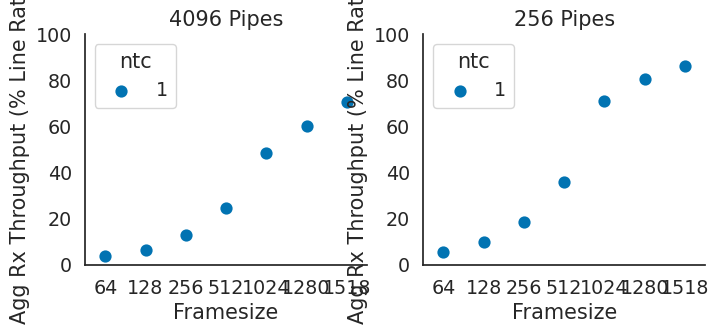

In [125]:
# %#matplotlib inline
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=[8, 3])

p_df = qostc_df[qostc_df["nsess"] == 4096]
p_df = p_df[p_df["ntc"] == 1]
sns.pointplot(
    data=p_df,
    x="Framesize",
    y='Agg Rx Throughput (% Line Rate)',
    hue="ntc",
    palette="colorblind",
    units="Trial",
    ax=ax1,
    ci=95,
    join=False,
)

p_df = qostc_df[qostc_df["nsess"] == 256]
p_df = p_df[p_df["ntc"] == 1]
sns.pointplot(
    data=p_df,
    x="Framesize",
    y= 'Agg Rx Throughput (% Line Rate)',
    hue="ntc",
    palette="colorblind",
    units="Trial",
    ax=ax2,
    ci=95,
    join=False,
)

ax1.set(
    xlabel="Framesize",
    #ylabel="Avg Latency (us)",
    ylim=[-0.2, 100],
    title="4096 Pipes",
    # xlim=[-0.2, 105],
)
ax2.set(
    xlabel="Framesize",
    #ylabel="Avg Latency (us)",
    ylim=[-0.2, 100],
    title="256 Pipes",
    # xlim=[-0.2, 105],
)

sns.despine()

In [12]:
DIR = f"/home/rubinhus/Documents/bisdn/ixia_measures/qosched_tc"
FILENAME = "AggregateLatencyBinsResults"

late_qostc_df = pd.DataFrame()
for direc, subdirec, files in os.walk(DIR):
    # print(direc,subdirec, files)

    filename = [i for i in files if FILENAME in i]

    if filename == []:
        continue

    csvs = [i for i in filename if "columns" not in i]

    repeat = 1

    for i in csvs:

        if "idx" in i:
            continue

        label = direc.split("/")[-2]
        t_df = pd.read_csv(direc + "/" + i)

        label_list = label.split("_")

        t_df["nhqos"] = int(label_list[1].strip("c"))
        t_df["nclass"] = int(label_list[2].strip("h"))

        if "4k" in label_list[3]:
            t_df["nsess"] = 4096
        elif "1k" in label_list[3]:
            t_df["nsess"] = 1024
        else:
            t_df["nsess"] = 256

        if len(label_list) > 4:
            t_df["ntc"] = int(label_list[-1].strip("tc"))
        else:
            t_df["ntc"] = 1

        late_qostc_df = pd.concat([late_qostc_df, t_df])

In [13]:
late_qostc_df.columns

Index(['Trial', 'Framesize', 'Iteration', 'Rx frames per Bin : 0us - 20us',
       'Rx frames per Bin : 20us - 25us', 'Rx frames per Bin : 25us - 30us',
       'Rx frames per Bin : 30us - 35us', 'Rx frames per Bin : 35us - 40us',
       'Rx frames per Bin : 40us - 45us', 'Rx frames per Bin : 45us - 50us',
       'Rx frames per Bin : 50us - 55us', 'Rx frames per Bin : 55us - 60us',
       'Rx frames per Bin : 60us - 65us', 'Rx frames per Bin : 65us - 70us',
       'Rx frames per Bin : 70us - 75us', 'Rx frames per Bin : 75us - 80us',
       'Rx frames per Bin : 80us - 85us', 'Rx frames per Bin : 85us - 90us',
       'Rx frames per Bin : 90us - maxus', 'nhqos', 'nclass', 'nsess', 'ntc',
       'Rx frames per Bin : 20us - 30us', 'Rx frames per Bin : 30us - 40us',
       'Rx frames per Bin : 40us - 50us', 'Rx frames per Bin : 50us - 60us',
       'Rx frames per Bin : 60us - 70us', 'Rx frames per Bin : 70us - 80us',
       'Rx frames per Bin : 80us - 90us', 'Rx frames per Bin : 90us - 100us'

In [73]:
late_qostc_df.columns
p_df = late_qostc_df.set_index(["nsess", "ntc"])
p_df = p_df[p_df["Framesize"] == 512]
p_df = (
    p_df.loc[:, p_df.columns.str.contains("Bin")]
    .rename(lambda x: x.strip("Rx frames per Bin : ").split("-")[1].strip("u"), axis=1)
    .reset_index()
)
hist_4k_df = (
    p_df[p_df["nsess"] == 4096]
    .groupby(["ntc"])
    .mean()
    # .astype(int)
    .reset_index()
    .transpose()
)
hist_1k_df = (
    p_df[p_df["nsess"] == 1024]
    .groupby(["ntc"])
    .mean()
    # .astype(int)
    .reset_index()
    .transpose()
)

ValueError: invalid literal for int() with base 10: ' max'

In [71]:
hist_4k_df

,0,1,2
ntc,1.0,2.0,4.0
nsess,4096.0,4096.0,4096.0
20,0.0,0.0,0.0
25,NaN,NaN,NaN
30,NaN,NaN,NaN
35,NaN,NaN,NaN
40,NaN,NaN,NaN
45,NaN,NaN,NaN
50,NaN,NaN,NaN
55,NaN,NaN,NaN


<Axes: >

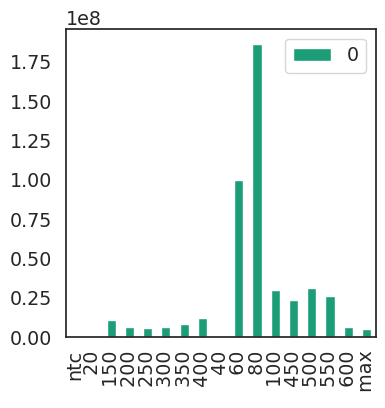

In [58]:
colors = ["#1b9e77", "#fdaa48", "#6890F0", "#A890F0"]
hist_1k_df.dropna().drop("nsess").plot(kind="bar", color=colors)

<Axes: >

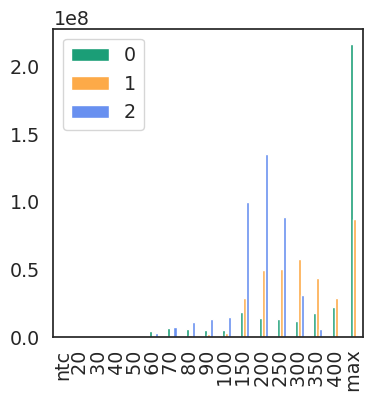

In [54]:
colors = ["#1b9e77", "#fdaa48", "#6890F0", "#A890F0"]
hist_4k_df.drop("nsess").dropna().plot(kind="bar", color=colors)

In [249]:
# cores == 1
# Qos == no
frequency = hist_4k_df.drop('nsess')[1].values[3:-1]
bins = hist_4k_df.drop('nsess')[1].index[3:]
#bins = [int(i.split(" ")[-1].strip("u")) for i in bins[-1]]
bins = [int(i.split(" ")[-1].strip("u")) - 24 for i in bins[:-1]]

# calculate sum
cumsum_frequencies = np.cumsum(frequency)
tc_1 = cumsum_frequencies / cumsum_frequencies[-1]

frequency = hist_4k_df.drop('nsess')[2].values[3:-1]
# calculate sum
cumsum_frequencies = np.cumsum(frequency)
tc_2 = cumsum_frequencies / cumsum_frequencies[-1]

frequency = hist_4k_df.drop('nsess')[4].values[3:-1]
# calculate sum
cumsum_frequencies = np.cumsum(frequency)
tc_4 = cumsum_frequencies / cumsum_frequencies[-1]


NameError: name 'bins' is not defined

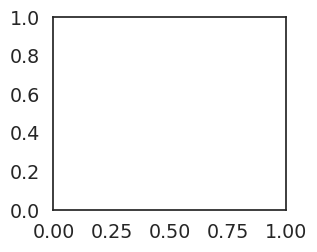

In [34]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=[3, 2.5])

ax1.plot(bins, tc_1, color='blue',)
ax1.plot(bins, tc_2, color='orange',)
ax1.plot(bins, tc_4, color='red',)

ax1.axhline(y=0.9, color='black', linestyle='-.', label='90% percentile')
ax1.axhline(y=0.5, color='black', linestyle='--', label='50% percentile')

ax1.set(
    xlabel="Latency (µs)",
    ylabel="ECDF",
    ylim=[-0.02, 1.02],
    #xlim=[-20, 400],
    #title='Effect of NIC priorization\non VoIP-like stream latency'
)
ax1.legend(loc='lower right', bbox_to_anchor=(2.3,0))

sns.despine()

# fig.savefig("/home/rubinhus/Documents/bisdn/ixia_measures//output_figures/nic_priorization.png", bbox_inches='tight')

## latency tc

In [3]:
DIR = f"/home/rubinhus/code/stats_measures/ixia_measures/smartqos_v1//"
FILENAMES = ['1tc', '2tc', '3tc', '4tc']

qostc_df = pd.DataFrame()

for filename in FILENAMES:
    t_df = pd.read_csv(DIR + filename + '_data.csv')
    qostc_df = pd.concat([qostc_df, t_df])

FileNotFoundError: [Errno 2] No such file or directory: '/home/rubinhus/code/stats_measures/ixia_measures/smartqos_v1//1tc_data.csv'

In [6]:
p_df = qostc_df[qostc_df['Flow Group'] == 'FG1-EndpointSet-2 - Flow Group 0001']
p_df['Exp'] = p_df['Exp'].apply(lambda x: x+1)
p_df

/tmp/ipykernel_18402/583914268.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_df['Exp'] = p_df['Exp'].apply(lambda x: x+1)


,Total L1 Bit Rate (bps),Trial,Exp,Tx Port,Rx Port,Traffic Item,Flow Group,Tx Frames,Rx Frames,Frames Delta,...,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,7.128000e+04,1.0,1.0,Ethernet - 001,Ethernet - 001,FG1,FG1-EndpointSet-2 - Flow Group 0001,2696.0,2696.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.128000e+04,2.0,1.0,Ethernet - 001,Ethernet - 001,FG1,FG1-EndpointSet-2 - Flow Group 0001,2606.0,2606.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7.128000e+04,3.0,1.0,Ethernet - 001,Ethernet - 001,FG1,FG1-EndpointSet-2 - Flow Group 0001,2606.0,2606.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7.128000e+04,4.0,1.0,Ethernet - 001,Ethernet - 001,FG1,FG1-EndpointSet-2 - Flow Group 0001,2606.0,2606.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7.128000e+04,5.0,1.0,Ethernet - 001,Ethernet - 001,FG1,FG1-EndpointSet-2 - Flow Group 0001,2696.0,2696.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1.000000e+09,1.0,2.0,Ethernet - 001,Ethernet - 001,FG1,FG1-EndpointSet-2 - Flow Group 0001,2606.0,2606.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.000000e+09,2.0,2.0,Ethernet - 001,Ethernet - 001,FG1,FG1-EndpointSet-2 - Flow Group 0001,2606.0,2606.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.000000e+09,3.0,2.0,Ethernet - 001,Ethernet - 001,FG1,FG1-EndpointSet-2 - Flow Group 0001,2696.0,2696.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.000000e+09,4.0,2.0,Ethernet - 001,Ethernet - 001,FG1,FG1-EndpointSet-2 - Flow Group 0001,2606.0,2606.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1.000000e+09,5.0,2.0,Ethernet - 001,Ethernet - 001,FG1,FG1-EndpointSet-2 - Flow Group 0001,2606.0,2606.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
pmelted_df = pd.melt(
    frame = p_df,
    id_vars = ['Exp', 'Total L1 Bit Rate (bps)'],
    value_vars = ['Cut-Through Avg Latency (ns)', 'Cut-Through Min Latency (ns)', 'Cut-Through Max Latency (ns)']
)
pmelted_df

,Exp,Total L1 Bit Rate (bps),variable,value
0,1.0,7.128000e+04,Cut-Through Avg Latency (ns),32118.0
1,1.0,7.128000e+04,Cut-Through Avg Latency (ns),32129.0
2,1.0,7.128000e+04,Cut-Through Avg Latency (ns),32112.0
3,1.0,7.128000e+04,Cut-Through Avg Latency (ns),32136.0
4,1.0,7.128000e+04,Cut-Through Avg Latency (ns),32128.0
...,...,...,...,...
160,3.0,9.000001e+09,Cut-Through Max Latency (ns),46915.0
161,3.0,9.000001e+09,Cut-Through Max Latency (ns),47897.0
162,3.0,9.000001e+09,Cut-Through Max Latency (ns),47720.0
163,3.0,9.000001e+09,Cut-Through Max Latency (ns),47572.0


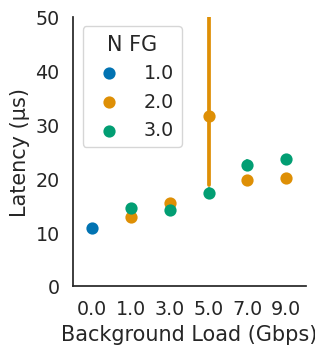

In [8]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=[3, 3.5])

sns.pointplot(
    data = p_df,
    x = (p_df['Total L1 Bit Rate (bps)']/10**9).round(0),
    y = (p_df['Cut-Through Max Latency (ns)'] - 23957)/10**3,
    hue = 'Exp',
    join = False,
    units = 'Trial',
    ax = ax1,
    ci = 95,
    palette = 'colorblind'
)

sns.despine()
ax1.set(
    xlabel="Background Load (Gbps)",
    ylabel="Latency (µs)",
    ylim=[-0.02, 50],
    # xlim=[-0.02, 10],
    title=''
)
ax1.legend(title='N FG')


In [115]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=[3, 2.5])

sns.boxplot(
    data=p_df,
    y=
    hue = 'tc',
)

ax1.set(
    xlabel="Background Load (Mpps)",
    ylabel="Latency (µs)",
    # ylim=[-0.02, 100],
    # xlim=[-0.02, 10],
    # title='Effect of NIC priorization\non VoIP-like stream latency'
)
# ax1.legend(loc='lower right', bbox_to_anchor=(2.3,0))
ax1.xaxis.set_major_locator(ticker.MultipleLocator(2))


sns.despine()

# fig.savefig("/home/rubinhus/Documents/phd/thesis/wuewowas/figures/wuewowas_draft.pdf", bbox_inches='tight')

SyntaxError: invalid syntax (4154050213.py, line 6)

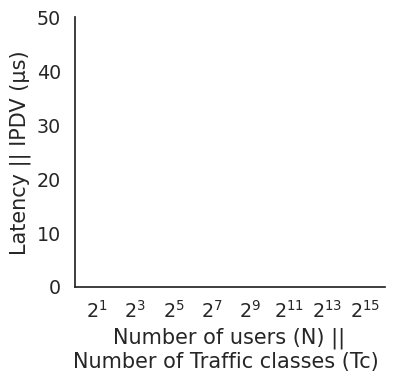

In [89]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=[4, 3.5])

ax1.set_xscale('log', base=2)

x = [4094,8192,16384,32768,65533]
#y = [0,0,0,0,0]
#ax1.plot(x)

sns.despine()
ax1.set(
    xlabel="Number of users (N) ||\nNumber of Traffic classes (Tc) ",
    ylabel="Latency || IPDV (µs)",
    ylim=[-0.02, 50],
    xlim=[-0.02, 65533],
    title=''
)
#
ax1.set_xticks(x)
ax1.xaxis.set_major_locator(ticker.LogLocator(base=2, numticks=9))

# ax1.legend(title='N FG')
# fig.savefig("/home/rubinhus/Documents/phd/thesis/wuewowas/figures/wuewowas_draft.pdf", bbox_inches='tight')

In [62]:
2**17




131072

In [20]:
DIR = f"/home/rubinhus/code/stats_measures/ixia_measures/smartqos_v1/e1_2/"
FILENAME = "Flow Statistics"

e1_1_df = pd.DataFrame()
for direc, subdirec, files in os.walk(DIR):
    # print(direc,subdirec, files)

    filename = [i for i in files if FILENAME in i]

    if filename == []:
        continue

    csvs = [i for i in filename if "columns" not in i]

    repeat = 1

    for i in csvs:

        if "idx" in i:
            continue

        label = direc.split("/")
        t_df = pd.read_csv(direc + "/" + i)
        t_df['nusers'] = int(label[-1])

       # label_list = label.split("_")
        
        e1_1_df = pd.concat([e1_1_df, t_df])

In [23]:
e1_1_df.columns

Index(['Tx Port', 'Rx Port', 'Traffic Item', 'Flow Group', 'Tx Frames',
       'Rx Frames', 'Frames Delta', 'Loss %', 'Tx Frame Rate', 'Rx Frame Rate',
       'Tx L1 Rate (bps)', 'Rx L1 Rate (bps)', 'Rx Bytes', 'Tx Rate (Bps)',
       'Rx Rate (Bps)', 'Tx Rate (bps)', 'Rx Rate (bps)', 'Tx Rate (Kbps)',
       'Rx Rate (Kbps)', 'Tx Rate (Mbps)', 'Rx Rate (Mbps)',
       'Cut-Through Avg Latency (ns)', 'Cut-Through Min Latency (ns)',
       'Cut-Through Max Latency (ns)', 'First TimeStamp', 'Last TimeStamp',
       'nusers'],
      dtype='object')

<Axes: xlabel='nusers', ylabel='Cut-Through Avg Latency (ns)'>

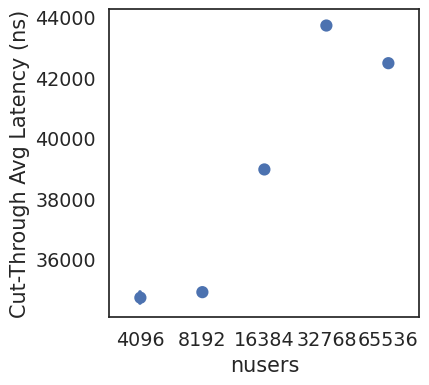

In [46]:
p_df = e1_1_df[e1_1_df['Flow Group'] == 'FG1-EndpointSet-2 - Flow Group 0001']
sns.pointplot(
    data = e1_1_df,
    x = 'nusers',
    y = 'Cut-Through Avg Latency (ns)',
    ci = 95,
    # y = 'Loss %',
    join = False
)

In [32]:
DIR = f"/home/rubinhus/code/stats_measures/ixia_measures/smartqos_v1/e1_2/"
FILENAME = "Flow Statistics"

e1_2_df = pd.DataFrame()
for direc, subdirec, files in os.walk(DIR):
    # print(direc,subdirec, files)

    filename = [i for i in files if FILENAME in i]

    if filename == []:
        continue

    csvs = [i for i in filename if "columns" not in i]

    repeat = 1

    for i in csvs:

        if "idx" in i:
            continue

        label = direc.split("/")
        t_df = pd.read_csv(direc + "/" + i)
        t_df['nusers'] = int(label[-1])

       # label_list = label.split("_")
        
        e1_2_df = pd.concat([e1_2_df, t_df])

<Axes: xlabel='nusers', ylabel='Cut-Through Max Latency (ns)'>

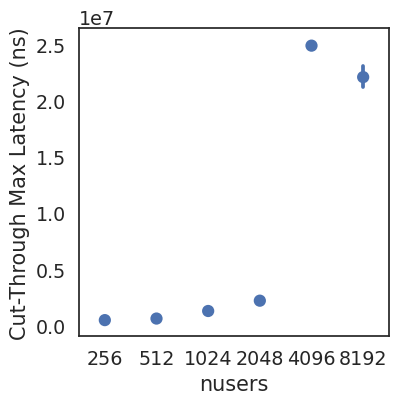

In [47]:
p_df = e1_2_df[e1_2_df['Flow Group'] == 'FG1-EndpointSet-2 - Flow Group 0001']
sns.pointplot(
    data = p_df,
    x = 'nusers',
    y = 'Cut-Through Max Latency (ns)',
   # y = 'Loss %',

    ci = 95,
    # y = 'Loss %',
    join = False
)


In [16]:
DIR = f"/home/rubinhus/code/stats_measures/ixia_measures/smartqos_e1"
FILENAME = "Flow Statistics"
EXPERIMENT = "e1_1"

e1_1_df = pd.DataFrame()
for direc, subdirec, files in os.walk(DIR):
    # print(direc,subdirec, files)

    filename = [i for i in files if FILENAME in i]

    if filename == [] or EXPERIMENT not in direc:
        continue

    csvs = [i for i in filename if "columns" not in i]

    repeat = 1

    for i in csvs:

        if "idx" in i:
            continue

        label = direc.split("/")
        #print(label)
        t_df = pd.read_csv(direc + "/" + i)
        t_df['Packet Size'] = int(label[-1])
        t_df['Number of Sessions'] = int(label[-2])
        t_df['Experiment'] = label[-3]

       # label_list = label.split("_")
        
        e1_1_df = pd.concat([e1_1_df, t_df])

In [20]:
e1_1_df.columns

Index(['Tx Port', 'Rx Port', 'Traffic Item', 'Flow Group', 'Tx Frames',
       'Rx Frames', 'Frames Delta', 'Loss %', 'Tx Frame Rate', 'Rx Frame Rate',
       'Tx L1 Rate (bps)', 'Rx L1 Rate (bps)', 'Rx Bytes', 'Tx Rate (Bps)',
       'Rx Rate (Bps)', 'Tx Rate (bps)', 'Rx Rate (bps)', 'Tx Rate (Kbps)',
       'Rx Rate (Kbps)', 'Tx Rate (Mbps)', 'Rx Rate (Mbps)',
       'Cut-Through Avg Latency (ns)', 'Cut-Through Min Latency (ns)',
       'Cut-Through Max Latency (ns)', 'First TimeStamp', 'Last TimeStamp',
       'Packet Size', 'Number of Sessions', 'Experiment'],
      dtype='object')

<Axes: xlabel='Number of Sessions', ylabel='Loss %'>

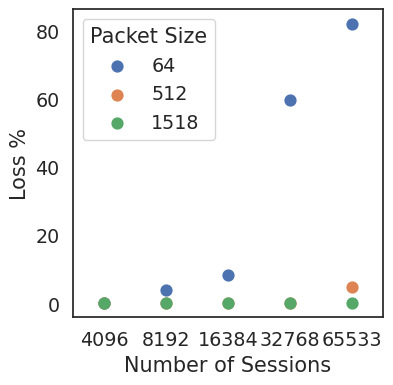

In [23]:
p_df = e1_1_df[e1_1_df['Flow Group'] == 'FG1-EndpointSet-2 - Flow Group 0001']
sns.pointplot(
    data = p_df,
    x = 'Number of Sessions',
    y = 'Loss %',
    hue = 'Packet Size',
    ci = 95,
    join = False,
)